In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers
import keras
 
%matplotlib inline
tf.random.set_seed(42)

In [5]:
df = pd.read_csv('../input/mobile-health/mhealth_raw_data.csv')
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.449020,-1.01030,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.449020,-1.01030,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.449020,-1.01030,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.456860,-1.00820,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.456860,-1.00820,0.025862,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-3.7198,-8.9071,0.294230,0.041176,-0.99384,-0.480600,0,subject10
1215741,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-3.7160,-8.7455,0.448140,0.041176,-0.99384,-0.480600,0,subject10
1215742,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-3.8824,-9.1155,0.450480,0.041176,-0.99384,-0.480600,0,subject10
1215743,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-3.5564,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0,subject10


In [7]:
df.Activity.value_counts()

11    30720
10    30720
9     30720
5     30720
4     30720
3     30720
2     30720
1     30720
0     30000
7     29441
8     29337
6     28315
12    10342
Name: Activity, dtype: int64

In [8]:
#Dropping duplicates
df = df.drop(df[df.duplicated(keep = 'first')].index, axis=0)

In [9]:
df.Activity.value_counts()

11    30720
10    30720
9     30720
5     30720
4     30720
3     30720
2     30720
1     30720
7     29441
8     29337
0     29085
6     28315
12    10342
Name: Activity, dtype: int64

In [10]:
label_map = {
    0: 'Nothing',
    1: 'Standing still',  
    2: 'Sitting and relaxing', 
    3: 'Lying down',  
    4: 'Walking',  
    5: 'Climbing stairs',  
    6: 'Waist bends forward',
    7: 'Frontal elevation of arms', 
    8: 'Knees bending (crouching)', 
    9: 'Cycling', 
    10: 'Jogging', 
    11: 'Running', 
    12: 'Jump front & back' 
}

In [11]:
#Defining functions to visualize comparisons.
def plot_comparison(data, metric = 'acceleration'):
 
  metric = metric[0].lower()
  data = data
 
  for i in range(0,13):
    plt.figure(figsize=(16,4))
 
    plt.subplot(1,2,1)
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'lx'], alpha=.7, label=metric+'lx')
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'ly'],color='red', alpha=.7, label=metric+'ly')
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'lz'],color='green', alpha=.7, label=metric+'lz')
    plt.title(f'{label_map[i]} - left-ankle')
    plt.legend()  
 
    plt.subplot(1,2,2)
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'rx'], alpha=.7, label=metric+'rx')
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'ry'],color='red', alpha=.7, label=metric+'ry')
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'rz'],color='green', alpha=.7, label=metric+'rz')
    plt.title(f'{label_map[i]} - right-lower-arm')
    plt.legend() 
 
    plt.show()
    print()
 
def plot_category(data,cat):
  array = (data[cat].value_counts().sort_values(ascending=False)/len(data))*100
  plt.barh(array.index, width = array.values)
  for index, value in enumerate(array.values):
      plt.text(value + .5 , index, s= '{:.1f}%'.format(value))
  plt.show()

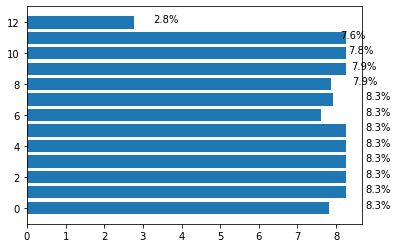

In [12]:
plot_category(df,'Activity')
plt.show()

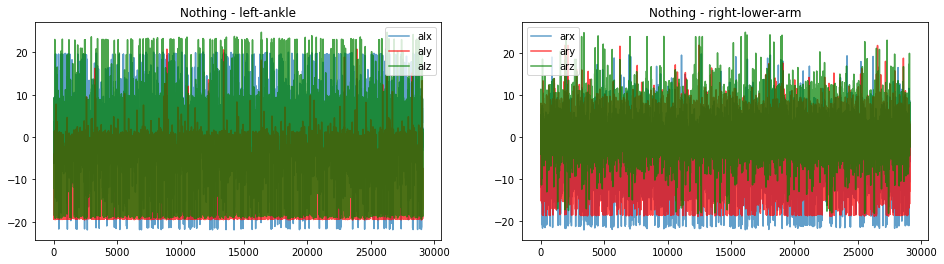

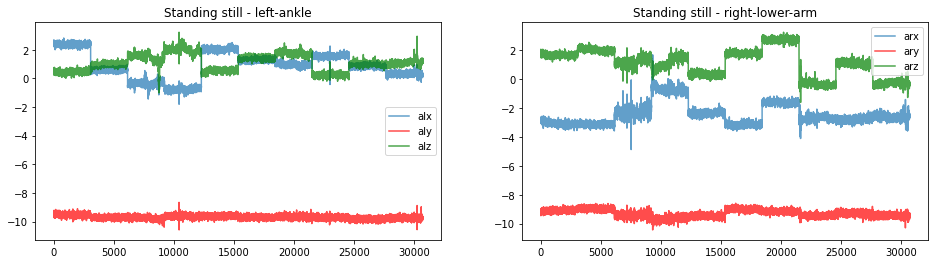

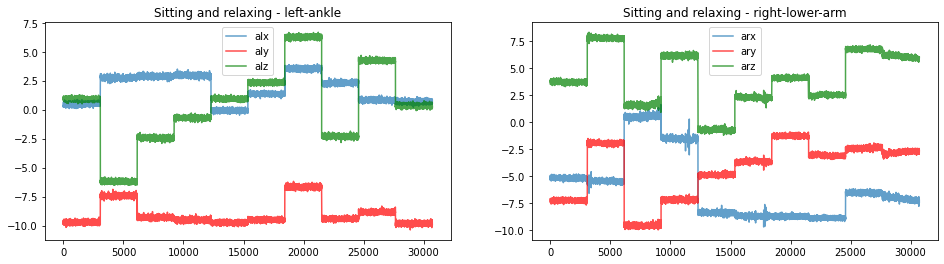

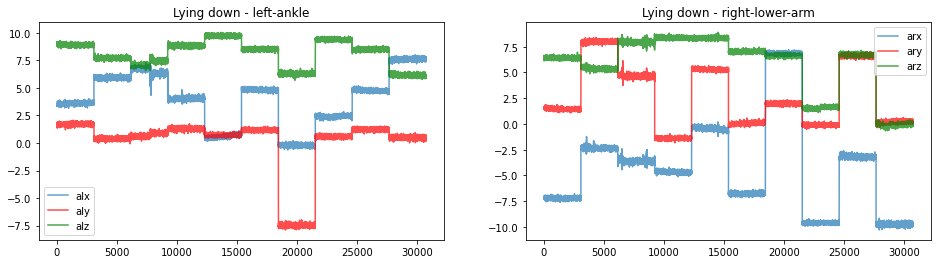

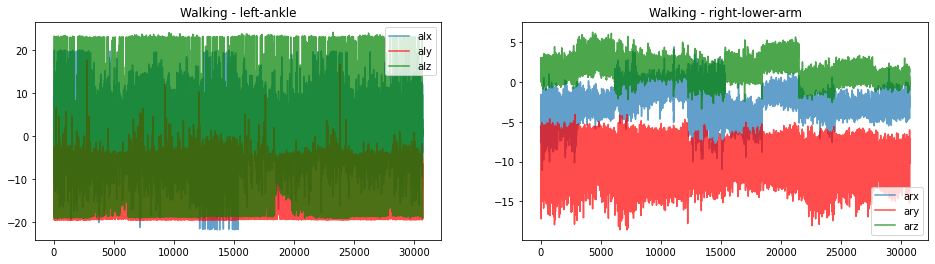

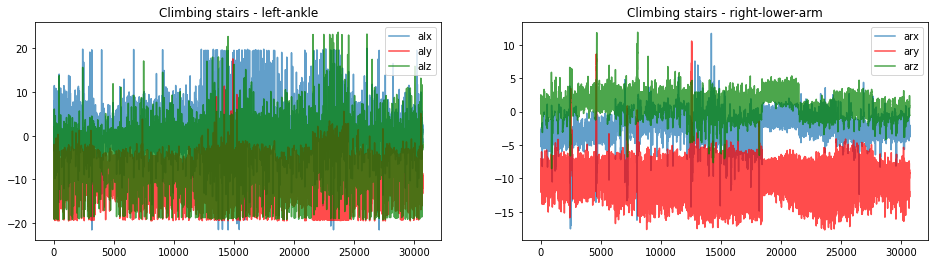

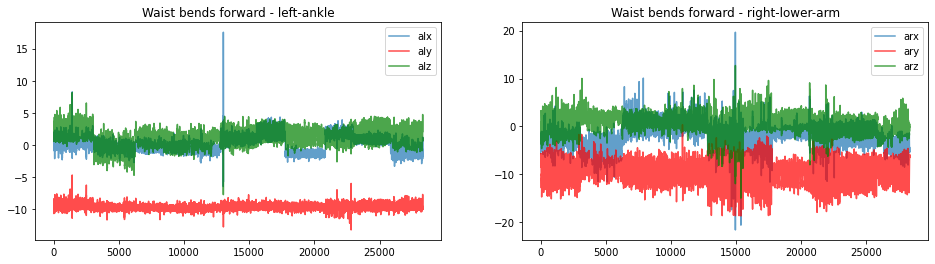

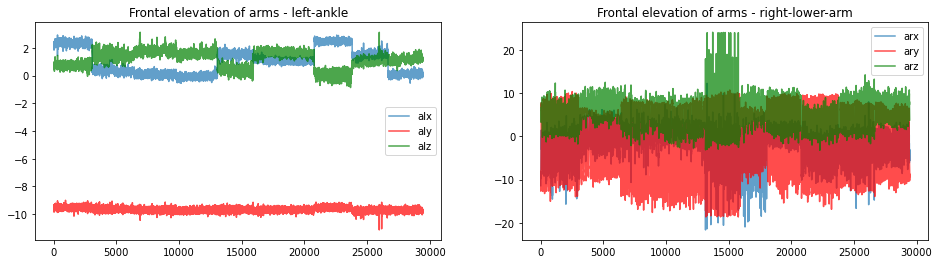

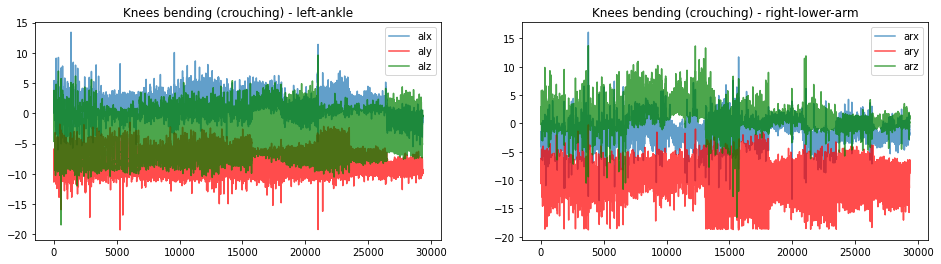

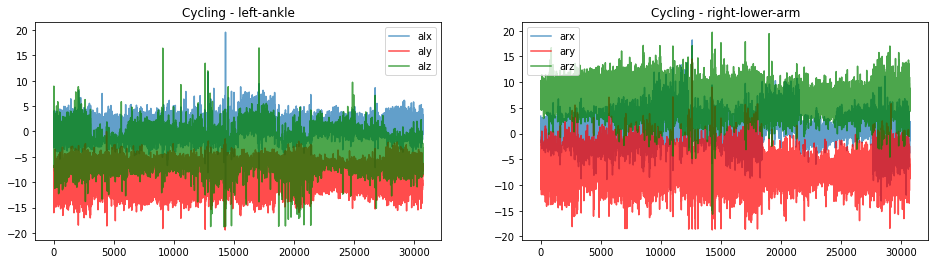

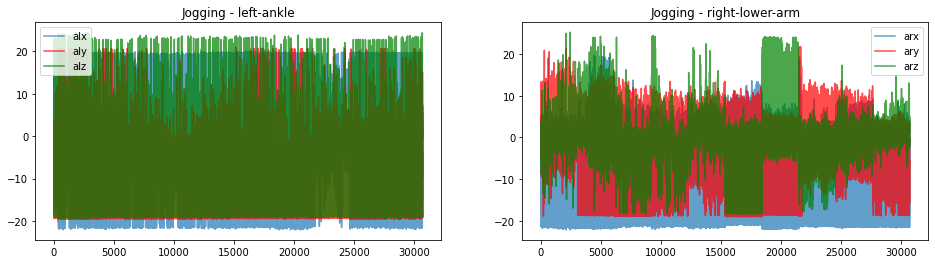

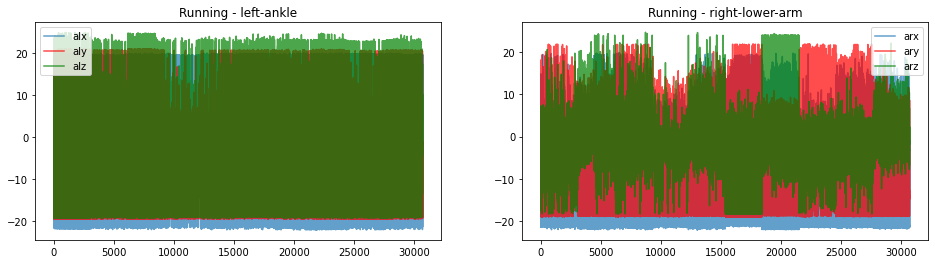

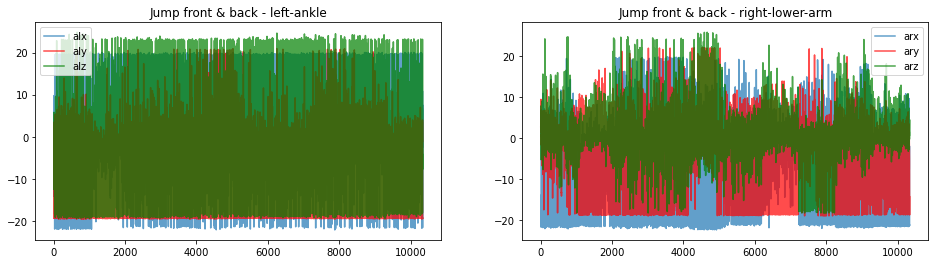

In [13]:
plot_comparison(df)

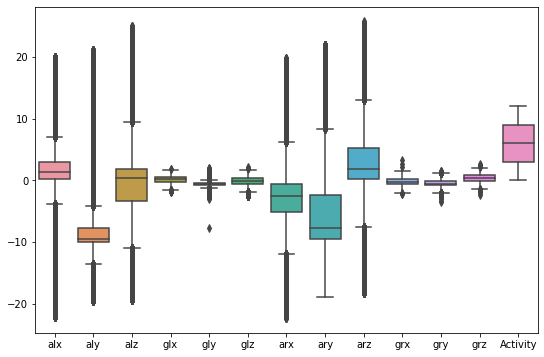

In [14]:
plt.figure(figsize=(9,6))
sns.boxplot(data=df)
plt.show()

In [15]:
df1 = df.copy()

In [16]:
#Dropping feature have data outside 98% confidence interval
for feature in df1.columns[:-2]:
  lower_range = np.quantile(df[feature],0.01)
  upper_range = np.quantile(df[feature],0.99)
  print(feature,'range:',lower_range,'to',upper_range)

  df1 = df1.drop(df1[(df1[feature]>upper_range) | (df1[feature]<lower_range)].index, axis=0)
  print('shape',df1.shape)

alx range: -11.481209999999999 to 19.234
shape (364839, 14)
aly range: -19.379 to 2.452431000000023
shape (359129, 14)
alz range: -18.95 to 14.181420000000042
shape (355387, 14)
glx range: -0.74212 to 0.80705
shape (348542, 14)
gly range: -1.0675 to 0.9662300000000001
shape (341987, 14)
glz range: -1.1061 to 0.82908
shape (336551, 14)
arx range: -21.492 to 9.104067000000057
shape (331475, 14)
ary range: -18.694000000000006 to 11.956630000000063
shape (325419, 14)
arz range: -10.38084 to 11.822
shape (322860, 14)
grx range: -1.0196 to 0.95686
shape (319392, 14)
gry range: -1.1417 to 0.9076
shape (314567, 14)
grz range: -0.69828 to 1.125
shape (310179, 14)


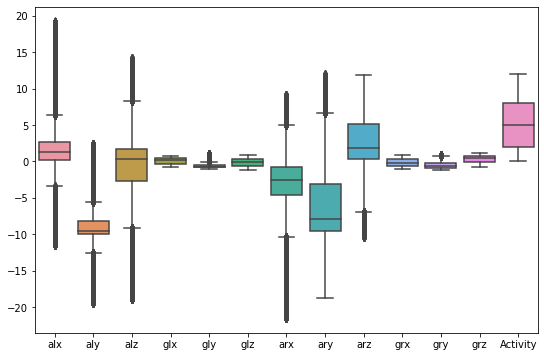

In [17]:
plt.figure(figsize=(9,6))
sns.boxplot(data=df1)
plt.show()

In [6]:
from sklearn.utils import resample
 
df_majority = df[df.Activity==0]
df_minorities = df[df.Activity!=0]
 
df_majority_downsampled = resample(df_majority,n_samples=30000, random_state=42)
df = pd.concat([df_majority_downsampled, df_minorities])
df.Activity.value_counts()

11    30720
10    30720
9     30720
5     30720
4     30720
3     30720
2     30720
1     30720
0     30000
7     29441
8     29337
6     28315
12    10342
Name: Activity, dtype: int64

In [85]:
#Dropping feature have data outside 98% confidence interval
df1 = df.copy()

for feature in df1.columns[:-2]:
  lower_range = np.quantile(df[feature],0.01)
  upper_range = np.quantile(df[feature],0.99)
  print(feature,'range:',lower_range,'to',upper_range)

  df1 = df1.drop(df1[(df1[feature]>upper_range) | (df1[feature]<lower_range)].index, axis=0)
  print('shape',df1.shape)

alx range: -11.473120000000002 to 19.233
shape (365733, 14)
aly range: -19.378999999999998 to 2.4478719999999976
shape (359934, 14)
alz range: -18.95 to 14.19623999999999
shape (356240, 14)
glx range: -0.74212 to 0.80705
shape (349347, 14)
gly range: -1.0694 to 0.96623
shape (342811, 14)
glz range: -1.1061 to 0.8290799999999999
shape (337361, 14)
arx range: -21.492 to 9.097647999999998
shape (332280, 14)
ary range: -18.694000000000006 to 11.948059999999998
shape (326215, 14)
arz range: -10.367 to 11.823119999999996
shape (323650, 14)
grx range: -1.0196 to 0.95686
shape (320165, 14)
gry range: -1.1417 to 0.90965
shape (315329, 14)
grz range: -0.69828 to 1.125
shape (310906, 14)


In [86]:
label_map = {
    0: 'Nothing',
    1: 'Standing still',  
    2: 'Sitting and relaxing', 
    3: 'Lying down',  
    4: 'Walking',  
    5: 'Climbing stairs',  
    6: 'Waist bends forward',
    7: 'Frontal elevation of arms', 
    8: 'Knees bending (crouching)', 
    9: 'Cycling', 
    10: 'Jogging', 
    11: 'Running', 
    12: 'Jump front & back' 
}

In [87]:
#spliting data into train and test set
train = df1[(df1['subject'] != 'subject10') & (df1['subject'] != 'subject9')]
test = df1.drop(train.index, axis=0)
train.shape,test.shape

((246483, 14), (64423, 14))

In [88]:
X_train = train.drop(['Activity','subject'],axis=1)
y_train = train['Activity']
X_test = test.drop(['Activity','subject'],axis=1)
y_test = test['Activity']
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((246483, 12), (246483,), (64423, 12), (64423,))

In [89]:
from scipy import stats

#function to create time series datset for seuence modeling
def create_dataset(X, y, time_steps, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        x = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(x)
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

In [90]:
X_train,y_train = create_dataset(X_train, y_train, 100, step=30)
X_train.shape, y_train.shape

((8213, 100, 12), (8213, 1))

In [91]:
X_test,y_test = create_dataset(X_test, y_test, 100, step=30)
X_test.shape, y_test.shape

((2145, 100, 12), (2145, 1))

In [92]:
model = keras.Sequential()
model.add(layers.Input(shape=[100,12]))
model.add(layers.Dense(180, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(150, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(13, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100, 180)          2340      
_________________________________________________________________
dropout_3 (Dropout)          (None, 100, 180)          0         
_________________________________________________________________
dense_13 (Dense)             (None, 100, 150)          27150     
_________________________________________________________________
flatten_3 (Flatten)          (None, 15000)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               1500100   
_________________________________________________________________
dense_15 (Dense)             (None, 13)                1313      
Total params: 1,530,903
Trainable params: 1,530,903
Non-trainable params: 0
____________________________________________

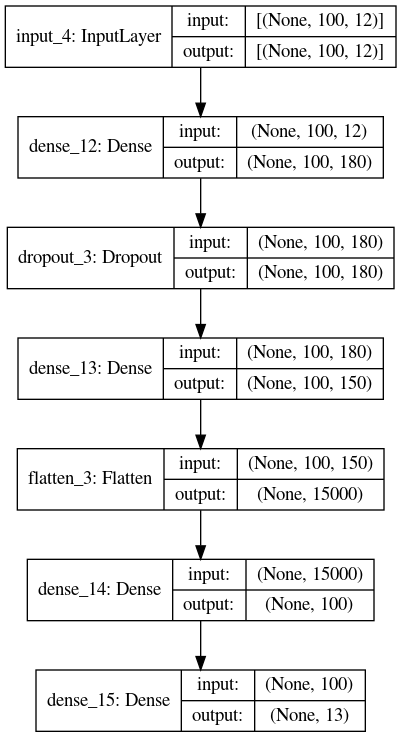

In [93]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [94]:
callbacks = [keras.callbacks.ModelCheckpoint("mhealth_best.h5", save_best_only=True, monitor="val_loss"),
             keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1)]
 
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"],)
 
model_history = model.fit(X_train,y_train, epochs= 10, validation_data=(X_test,y_test), callbacks=callbacks)

Epoch 1/10
257/257 [==============================] - 1s 4ms/step - loss: 2.1426 - sparse_categorical_accuracy: 0.5345 - val_loss: 0.3260 - val_sparse_categorical_accuracy: 0.8769
Epoch 2/10
257/257 [==============================] - 1s 3ms/step - loss: 0.1602 - sparse_categorical_accuracy: 0.9540 - val_loss: 0.4441 - val_sparse_categorical_accuracy: 0.8378
Epoch 3/10
257/257 [==============================] - 1s 3ms/step - loss: 0.0700 - sparse_categorical_accuracy: 0.9814 - val_loss: 0.4129 - val_sparse_categorical_accuracy: 0.8573
Epoch 4/10
257/257 [==============================] - 1s 3ms/step - loss: 0.0566 - sparse_categorical_accuracy: 0.9835 - val_loss: 0.2892 - val_sparse_categorical_accuracy: 0.9235
Epoch 5/10
257/257 [==============================] - 1s 3ms/step - loss: 0.0272 - sparse_categorical_accuracy: 0.9935 - val_loss: 0.3715 - val_sparse_categorical_accuracy: 0.8965
Epoch 6/10
257/257 [==============================] - 1s 3ms/step - loss: 0.0270 - sparse_categorica

# Model Evaluation

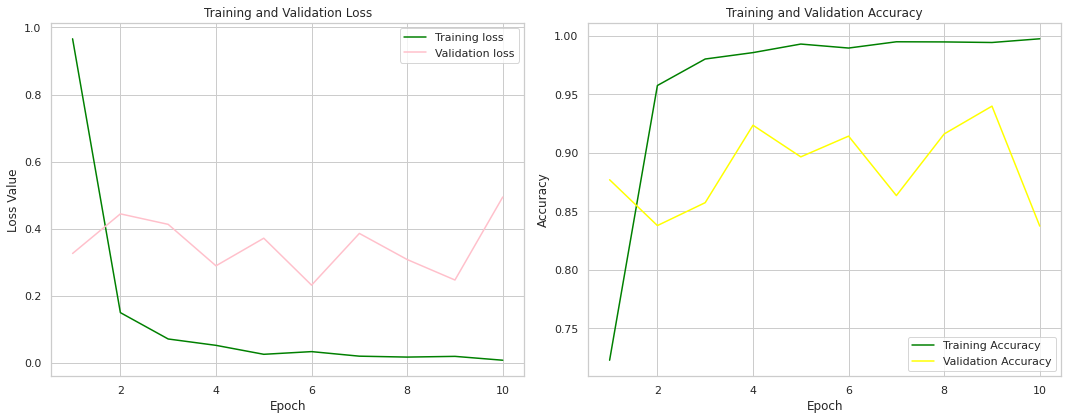

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have imported the necessary libraries and have model_history available

train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
train_accuracy = model_history.history['sparse_categorical_accuracy']
val_accuracy = model_history.history['val_sparse_categorical_accuracy']

# Set Seaborn style
sns.set(style="whitegrid")

# Create a figure with subplots
plt.figure(figsize=(15, 6))

# Subplot 1: Training and Validation Loss
plt.subplot(1, 2, 1)
sns.lineplot(x=range(1, len(train_loss) + 1), y=train_loss, color='green', label='Training loss')
sns.lineplot(x=range(1, len(val_loss) + 1), y=val_loss, color='pink', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()

# Subplot 2: Training and Validation Accuracy
plt.subplot(1, 2, 2)
sns.lineplot(x=range(1, len(train_accuracy) + 1), y=train_accuracy, color='green', label='Training Accuracy')
sns.lineplot(x=range(1, len(val_accuracy) + 1), y=val_accuracy, color='yellow', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [96]:
model = keras.models.load_model('./mhealth_best.h5')

train_loss, train_acc = model.evaluate(X_train,y_train)
test_loss, test_acc = model.evaluate(X_test,y_test)

print("Train accuracy", round(train_acc*100, 2),'%')
print("Train loss", train_loss)
print("Test accuracy", round(test_acc*100, 2),'%')
print("Test loss", test_loss)

68/68 [==============================] - 0s 2ms/step - loss: 0.2316 - sparse_categorical_accuracy: 0.9142
Train accuracy 99.53 %
Train loss 0.020896615460515022
Test accuracy 91.42 %
Test loss 0.23159830272197723


In [97]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis = 1)
pred = pred.reshape(-1,1)

In [98]:
pred.shape,y_test.shape

((2145, 1), (2145, 1))

In [99]:
from sklearn.metrics import confusion_matrix, classification_report
 
print(classification_report(y_test,pred))

print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       153
           1       0.98      1.00      0.99       204
           2       0.99      0.50      0.66       206
           3       0.99      1.00      1.00       204
           4       0.97      0.97      0.97       200
           5       0.84      0.78      0.81       140
           6       0.92      0.99      0.95       175
           7       0.65      0.99      0.78       187
           8       0.85      0.87      0.86       194
           9       1.00      1.00      1.00       201
          10       0.99      0.99      0.99       149
          11       0.99      0.99      0.99        87
          12       0.96      0.98      0.97        45

    accuracy                           0.91      2145
   macro avg       0.93      0.92      0.92      2145
weighted avg       0.93      0.91      0.91      2145

[[141   0   0   0   4   7   0   0   0   0   0   0   1]
 [  0 204   0   0   0   

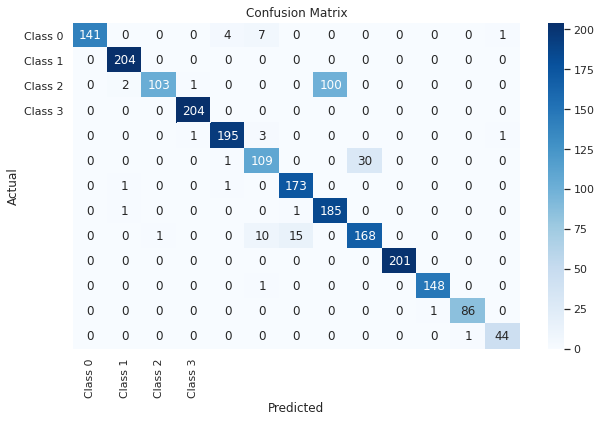

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have imported the necessary libraries and have y_test and pred available

# Define your label_map if not already defined
label_map = {0: 'Class 0', 1: 'Class 1', 2: 'Class 2', 3: 'Class 3'}

# Create a figure
plt.figure(figsize=(10, 6))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, pred)

# Set a different color map, e.g., 'Blues', 'Greens', 'Oranges', 'Reds', etc.
cmap = 'Blues'  # You can choose the color map that you prefer

# Create a heatmap using seaborn
sns.heatmap(conf_matrix, xticklabels=label_map.values(), yticklabels=label_map.values(), annot=True, fmt="d", cmap=cmap)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()
